In [7]:
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px


In [19]:
portfolios_mock['stocks'][0]['transactions'][0]


{'Date': '10/25/21',
 'Shares': 3.0,
 'Price': 108.83,
 'Cost': 326.49,
 'Currency': 'USD',
 'Exchange': 3.2,
 'totalGain': 37.56}

In [ ]:
pd.options.plotting.backend = "plotly"

In [8]:
def load_portfolios_mock(portfolios_mock_path):
    with open(portfolios_mock_path) as f_in:
        return json.load(f_in)

def save_portfolios_mock(portfolios_mock_path, data):
    with open(portfolios_mock_path, 'w') as f_out:
        json.dump(data, f_out)

In [9]:
mock_folder = Path('./web/client/src/mocks')
portfolios_mock_path = mock_folder/'portfolios.json'

In [10]:
portfolios_mock = load_portfolios_mock(portfolios_mock_path)[0]

In [69]:
# for stock in tqdm(portfolios_mock['stocks']):
#     ticker = yf.Ticker(stock['symbol'])
#     stock['sector'] = ticker.info['sector']
#     stock['industry'] = ticker.info['industry']
    

In [70]:
# save_portfolios_mock(portfolios_mock_path, [portfolios_mock])

In [178]:
df = pd.DataFrame(portfolios_mock['stocks'])
df

,symbol,transactions,price,shortName,longName,quantity,value,cost,totalGain,sector,industry
0,ABBV,"[{'Date': '10/25/21', 'Shares': 3.0, 'Price': ...",149.7033,AbbVie Inc.,AbbVie Inc.,5.0,748.5165,585.42,27.86,Healthcare,Drug Manufacturers - General
1,BMY,"[{'Date': '10/22/21', 'Shares': 10.0, 'Price':...",68.6000,Bristol-Myers Squibb Company,Bristol-Myers Squibb Company,10.0,686.0000,575.90,19.12,Healthcare,Drug Manufacturers - General
2,FNF,"[{'Date': '10/28/21', 'Shares': 3.0, 'Price': ...",46.3600,FNF Group of Fidelity National,"Fidelity National Financial, Inc.",3.0,139.0800,144.06,-3.46,Financial Services,Insurance - Specialty
3,JNJ,"[{'Date': '11/12/21', 'Shares': 2.0, 'Price': ...",170.3600,Johnson & Johnson,Johnson & Johnson,2.0,340.7200,335.84,1.45,Healthcare,Drug Manufacturers - General
4,LMT,"[{'Date': '10/27/21', 'Shares': 1.0, 'Price': ...",473.6700,Lockheed Martin Corporation,Lockheed Martin Corporation,1.0,473.6700,334.28,41.70,Industrials,Aerospace & Defense
5,MED,"[{'Date': '10/25/21', 'Shares': 1.0, 'Price': ...",182.0000,MEDIFAST INC,"Medifast, Inc.",2.0,364.0000,407.90,-10.76,Consumer Cyclical,Personal Services
6,MPW,"[{'Date': '10/22/21', 'Shares': 19.0, 'Price':...",20.4500,"Medical Properties Trust, Inc.","Medical Properties Trust, Inc.",19.0,388.5500,393.68,-1.30,Real Estate,REIT - Healthcare Facilities
7,O,"[{'Date': '10/25/21', 'Shares': 3.0, 'Price': ...",65.3700,Realty Income Corporation,Realty Income Corporation,5.0,326.8500,357.91,-8.68,Real Estate,REIT - Retail
8,PEBO,"[{'Date': '10/25/21', 'Shares': 9.0, 'Price': ...",32.0200,Peoples Bancorp Inc.,Peoples Bancorp Inc.,9.0,288.1800,299.34,-3.73,Financial Services,Banks - Regional
9,PFE,"[{'Date': '11/12/21', 'Shares': 6.0, 'Price': ...",48.6900,"Pfizer, Inc.",Pfizer Inc.,6.0,292.1400,300.78,-2.87,Healthcare,Drug Manufacturers - General


In [185]:
df.groupby(['sector']).sum()

,price,quantity,value,cost,totalGain
sector,,,,,
Consumer Cyclical,182.0000,2.0,364.0000,407.90,-10.76
Financial Services,78.3800,12.0,427.2600,443.40,-7.19
Healthcare,437.3533,23.0,2067.3765,1797.94,45.56
Industrials,473.6700,1.0,473.6700,334.28,41.70
Real Estate,85.8200,24.0,715.4000,751.59,-9.98


In [193]:
# df.groupby(['sector']).sum()['value'].reset_index()

fig = px.pie(df.groupby(['sector']).sum().reset_index(), values='value', names='sector')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

fig = px.pie(df.groupby(['industry']).sum().reset_index(), values='value', names='industry')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [72]:
# help(pd.to_datetime)

In [85]:
transactions = []
for stock in portfolios_mock['stocks']:
    transactions += [{'symbol': stock['symbol'], **transaction} for transaction in stock['transactions']]
    
df_transactions = pd.DataFrame(transactions)
df_transactions.Date = pd.to_datetime(df_transactions.Date, format='%m/%d/%y')
df_transactions.index = df_transactions.Date
df_transactions = df_transactions.drop(columns='totalGain')
df_transactions = df_transactions.sort_index()
df_transactions

,symbol,Date,Shares,Price,Cost,Currency,Exchange
Date,,,,,,,
2021-10-22,BMY,2021-10-22,10.0,57.59,575.90,USD,3.21
2021-10-22,MPW,2021-10-22,19.0,20.72,393.68,USD,3.21
2021-10-25,ABBV,2021-10-25,3.0,108.83,326.49,USD,3.20
2021-10-25,MED,2021-10-25,1.0,205.60,205.60,USD,3.20
2021-10-25,O,2021-10-25,3.0,74.40,223.20,USD,3.20
2021-10-25,PEBO,2021-10-25,9.0,33.26,299.34,USD,3.20
2021-10-27,LMT,2021-10-27,1.0,334.28,334.28,USD,3.19
2021-10-28,FNF,2021-10-28,3.0,48.02,144.06,USD,3.16
2021-11-12,JNJ,2021-11-12,2.0,167.92,335.84,USD,3.10


In [172]:
def get_weights(transactions_df, date, tickers):
    cost = transactions_df[transactions_df.index <= date].groupby(['symbol'])['Cost'].sum()
    weights = cost/cost.sum()

    return [weights.get(ticker, 0) for ticker in tickers]

def plot_daily_return(total_pct_change_df):
    fig = go.Figure()
    fig.add_trace(
      go.Bar(name='Daily Return',
            x=total_pct_change_df.index,
            y=(total_pct_change_df * 100),
            marker_color=np.where(total_pct_change_df<0, 'red', 'green')))
    fig.update_layout(barmode='stack')
    fig.show()


In [101]:
stocks_start = df_transactions.Date.min()

In [136]:
symbols = df_transactions.symbol.unique().tolist()
df_hisotry_data = yf.download(symbols, start=df_transactions.index.min(), end=datetime.today())
pct_change = df_hisotry_data['Adj Close'].pct_change(1).dropna()
total_pct_change = [np.dot(get_weights(df_transactions, row[1][0], symbols), row[1][1:]) for row in pct_change.reset_index().iterrows()]
total_pct_change_df = pd.Series(total_pct_change, index=pct_change.index)

[*********************100%***********************]  10 of 10 completed


[*********************100%***********************]  1 of 1 completed


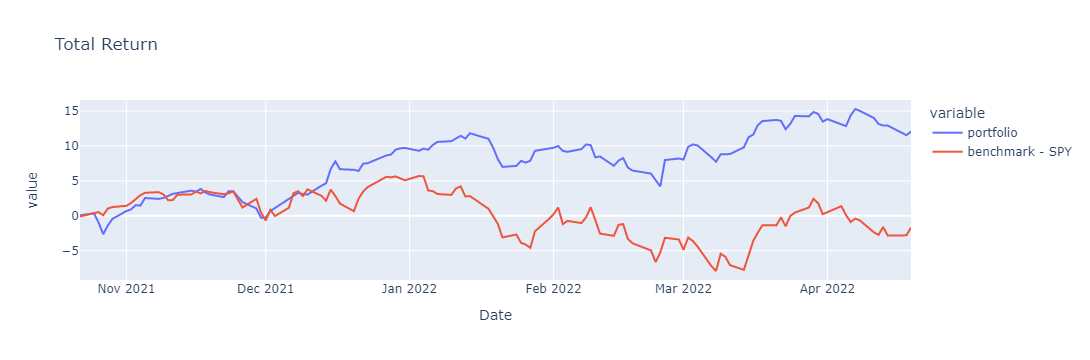

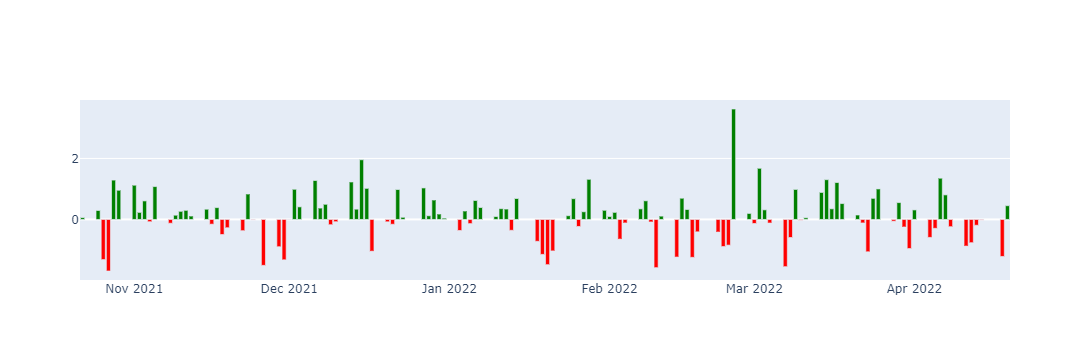

In [175]:
# df_hisotry_data['Adj Close'].pct_change(1).dropna()
# list(pct_change.reset_index().iterrows())
# total_pct_change
# total_pct_change_df.plot.bar()
benchmark_name = 'SPY'
cumprod_df = (((1 + total_pct_change_df).cumprod() - 1)*100)
benchmark = yf.download(benchmark_name, start=df_transactions.index.min(), end=datetime.today())['Adj Close'].pct_change(1).dropna()
fig = pd.DataFrame({'portfolio': cumprod_df, f'benchmark - {benchmark_name}':  (((1+benchmark).cumprod() - 1)*100) }).plot(title='Total Return')
fig.show()

plot_daily_return(total_pct_change_df)

In [159]:
cumprod_df.index.strftime('%Y-%m-%d')

Index(['2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
       '2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
       ...
       '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-11',
       '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-18', '2022-04-19'],
      dtype='object', name='Date', length=123)

In [169]:
# save_portfolios_mock(mock_folder/'total_return.json', pd.DataFrame({'date': cumprod_df.index.strftime('%Y-%m-%d'), 'return': cumprod_df.values, 'benchmark_return': (((1+benchmark).cumprod() - 1)*100)}).to_dict('records'))
save_portfolios_mock(mock_folder/'daily_return.json', pd.DataFrame({'date': total_pct_change_df.index.strftime('%Y-%m-%d'), 'return': total_pct_change_df.values*100, 'benchmark_return': benchmark*100}).to_dict('records'))



In [144]:
qs.reports.metrics(total_pct_change_df, benchmark='SPY', match_dates=True, mode='basic')

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2021-10-22  2021-10-22
End Period          2022-04-19  2022-04-19
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      100.0%

Cumulative Return   11.98%      -1.63%
CAGR﹪              25.95%      -3.3%

Sharpe              1.86        -0.09
Sortino             2.94        -0.13
Sortino/√2          2.08        -0.09
Omega               1.37        1.37

Max Drawdown        -6.8%       -12.87%
Longest DD Days     58          105

Gain/Pain Ratio     0.37        -0.01
Gain/Pain (1M)      3.98        -0.08

Payoff Ratio        1.11        0.81
Profit Factor       1.37        0.99
Common Sense Ratio  1.35        0.93
CPC Index           0.84        0.4
Tail Ratio          0.99        0.94
Outlier Win Ratio   3.44        2.42
Outlier Loss Ratio  3.32        2.05

MTD                 -1.27%      -1.96%
3M                  0.21%       -4.42%
6M                  11.98%     

In [ ]:
def get_portfolio_history_data(df):
  transactions_df = df[['Ticker Full', 'Date', 'Shares', 'Price', 'Current Value']]
  transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])

  transactions_df = transactions_df.set_index('Date')

  tickers = transactions_df['Ticker Full'].unique().tolist()

  df_hisotry_data = yf.download(tickers, start=transactions_df.index.min(), end=datetime.today())
  pct_change = df_hisotry_data['Adj Close'].pct_change(1).dropna()

  total_pct_change = [np.dot(get_weights(transactions_df, row[1][0], tickers), row[1][1:]) for row in pct_change.reset_index().iterrows()]

  return transactions_df, pd.Series(total_pct_change, index=pct_change.index)

In [86]:
df_transactions[df_transactions.symbol == 'ABBV']

,symbol,Date,Shares,Price,Cost,Currency,Exchange
Date,,,,,,,
2021-10-25,ABBV,2021-10-25,3.0,108.83,326.49,USD,3.20
2021-12-08,ABBV,2021-12-08,1.0,121.80,121.80,USD,3.16
2022-01-12,ABBV,2022-01-12,1.0,137.13,137.13,USD,3.11


In [102]:
temp_df = yf.download('ABBV', start=stocks_start, end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [106]:
total_pct_change_df = temp_df['Adj Close'].pct_change(1).dropna()


# (1 + total_pct_change_df).cumprod() - 1

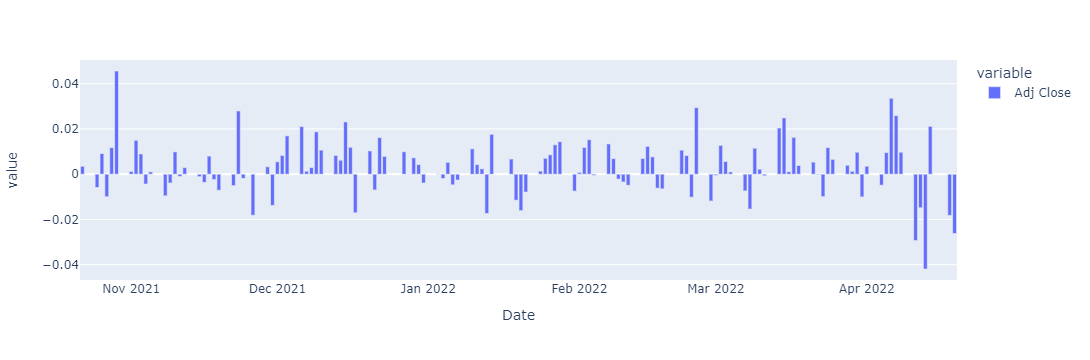

In [114]:
total_pct_change_df.plot.bar()

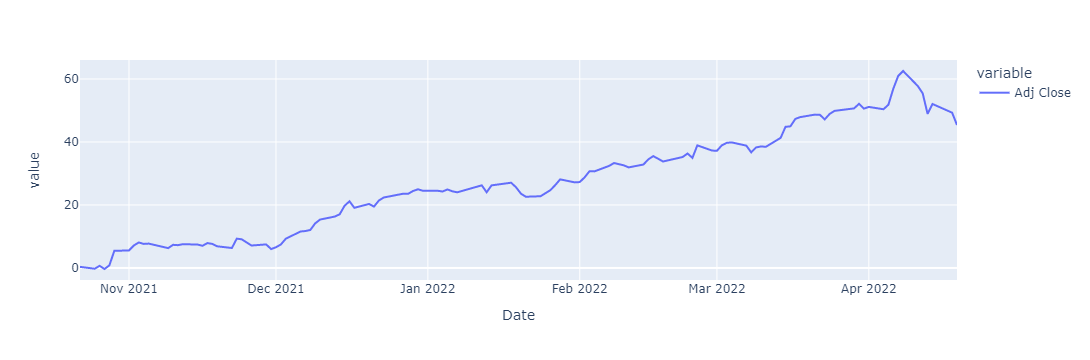

In [113]:
(((1 + total_pct_change_df).cumprod() - 1)*100).plot()

In [75]:
# stocks_end = portfolio_df.Date.max()

In [76]:
from datetime import datetime



In [77]:
stocks_start

Timestamp('2021-10-22 00:00:00')

In [78]:
df = yf.download(['ABBV', 'MSFT'], start=stocks_start, end=datetime.today())['Adj Close']

[*********************100%***********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

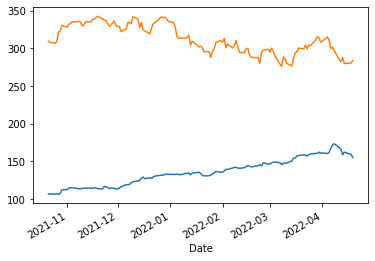

In [79]:
df['ABBV'].plot()
df['MSFT'].plot()

In [1]:
import funcy

In [11]:
data = [
  {
    "id": 133,
    "name": "Roman",
    "transactions": [
      {
        "quantity": 10,
        "purchase_currency": 30,
        "exchange": 0,
        "stock_id": 2,
        "purchase_price": 20,
        "id": 1,
        "origin_currency": "string",
        "date": "2022-08-13",
        "portfolio_id": 133,
        "cost": 200,
        "current_price": 55.84000015258789,
        "total_gain": 358.4000015258789
      },
      {
        "quantity": 10,
        "purchase_currency": 30,
        "exchange": 0,
        "stock_id": 2,
        "purchase_price": 20,
        "id": 2,
        "origin_currency": "string",
        "date": "2022-08-13",
        "portfolio_id": 133,
        "cost": 200,
        "current_price": 17.239999771118164,
        "total_gain": -27.60000228881836
      },
      {
        "quantity": 10,
        "purchase_currency": 30,
        "exchange": 0,
        "stock_id": 5,
        "purchase_price": 20,
        "id": 3,
        "origin_currency": "string",
        "date": "2022-08-13",
        "portfolio_id": 133,
        "cost": 200,
        "current_price": 9.90999984741211,
        "total_gain": -100.9000015258789
      },
      {
        "quantity": 10,
        "purchase_currency": 30,
        "exchange": 0,
        "stock_id": 8,
        "purchase_price": 20,
        "id": 4,
        "origin_currency": "string",
        "date": "2022-08-13",
        "portfolio_id": 133,
        "cost": 200,
        "current_price": 9.90999984741211,
        "total_gain": -100.9000015258789
      },
      {
        "quantity": 10,
        "purchase_currency": 30,
        "exchange": 0,
        "stock_id": 11,
        "purchase_price": 20,
        "id": 5,
        "origin_currency": "string",
        "date": "2022-08-13",
        "portfolio_id": 133,
        "cost": 200,
        "current_price": 50.75,
        "total_gain": 307.5
      },
      {
        "quantity": 10,
        "purchase_currency": 30,
        "exchange": 0,
        "stock_id": 22,
        "purchase_price": 20,
        "id": 6,
        "origin_currency": "string",
        "date": "2022-08-13",
        "portfolio_id": 133,
        "cost": 200,
        "current_price": 28.530000686645508,
        "total_gain": 85.30000686645508
      }
    ],
    "stocks": {
      "2": {
        "long_name": "Alcoa Corporation",
        "symbol": "AA",
        "sector": "Basic Materials",
        "country": "United States",
        "financial_currency": "USD",
        "short_name": "Alcoa Corporation",
        "id": 2,
        "industry": "Aluminum",
        "website": "https://www.alcoa.com",
        "market": "us_market",
        "price": 55.84000015258789
      },
      "4": {
        "long_name": "Goldman Sachs Physical Gold ETF",
        "symbol": "AAAU",
        "sector": "",
        "country": "",
        "financial_currency": "",
        "short_name": "Goldman Sachs Physical Gold ETF",
        "id": 4,
        "industry": "",
        "website": "",
        "market": "us_market",
        "price": 17.239999771118164
      },
      "5": {
        "long_name": "Ares Acquisition Corporation",
        "symbol": "AAC",
        "sector": "Financial Services",
        "country": "United States",
        "financial_currency": "USD",
        "short_name": "Ares Acquisition Corporation",
        "id": 5,
        "industry": "Shell Companies",
        "website": "https://www.aresacquisitioncorporation.com",
        "market": "us_market",
        "price": 9.90999984741211
      },
      "8": {
        "long_name": "Armada Acquisition Corp. I",
        "symbol": "AACIU",
        "sector": "Financial Services",
        "country": "United States",
        "financial_currency": "USD",
        "short_name": "Armada Acquisition Corp. I",
        "id": 8,
        "industry": "Shell Companies",
        "website": "",
        "market": "us_market",
        "price": 9.90999984741211
      },
      "11": {
        "long_name": "AdvisorShares Dorsey Wright ADR ETF",
        "symbol": "AADR",
        "sector": "",
        "country": "",
        "financial_currency": "",
        "short_name": "AdvisorShares Dorsey Wright",
        "id": 11,
        "industry": "",
        "website": "",
        "market": "us_market",
        "price": 50.75
      },
      "22": {
        "long_name": "American Assets Trust, Inc.",
        "symbol": "AAT",
        "sector": "Real Estate",
        "country": "United States",
        "financial_currency": "USD",
        "short_name": "American Assets Trust, Inc.",
        "id": 22,
        "industry": "REIT—Diversified",
        "website": "https://www.americanassetstrust.com",
        "market": "us_market",
        "price": 28.530000686645508
      }
    }
  }
]

In [13]:
transcations_by_stock_id = funcy.group_by(lambda x: x['stock_id'], data[0]['transactions'])

In [18]:
for key, transactions in transcations_by_stock_id.items():
    data[0]['stocks'][str(key)]['quantity'] = sum(map(lambda x: x['quantity'], transactions))
    data[0]['stocks'][str(key)]['total_gain'] = sum(map(lambda x: x['total_gain'], transactions))
    data[0]['stocks'][str(key)]['cost'] = sum(map(lambda x: x['cost'], transactions))

In [24]:
import pandas as pd

pd.DataFrame(data[0]['stocks'].values())

,long_name,symbol,sector,country,financial_currency,short_name,id,industry,website,market,price,quantity,total_gain,cost
0,Alcoa Corporation,AA,Basic Materials,United States,USD,Alcoa Corporation,2,Aluminum,https://www.alcoa.com,us_market,55.840000,20.0,330.799999,400.0
1,Goldman Sachs Physical Gold ETF,AAAU,,,,Goldman Sachs Physical Gold ETF,4,,,us_market,17.240000,NaN,NaN,NaN
2,Ares Acquisition Corporation,AAC,Financial Services,United States,USD,Ares Acquisition Corporation,5,Shell Companies,https://www.aresacquisitioncorporation.com,us_market,9.910000,10.0,-100.900002,200.0
3,Armada Acquisition Corp. I,AACIU,Financial Services,United States,USD,Armada Acquisition Corp. I,8,Shell Companies,,us_market,9.910000,10.0,-100.900002,200.0
4,AdvisorShares Dorsey Wright ADR ETF,AADR,,,,AdvisorShares Dorsey Wright,11,,,us_market,50.750000,10.0,307.500000,200.0
5,"American Assets Trust, Inc.",AAT,Real Estate,United States,USD,"American Assets Trust, Inc.",22,REIT—Diversified,https://www.americanassetstrust.com,us_market,28.530001,10.0,85.300007,200.0


In [25]:
import yfinance as yf

In [32]:
yf.Ticker('ABBV').info['lastDividendValue'] * 4

5.64

In [34]:
yf.Ticker('ABBV').info['dividendRate']

5.64

In [36]:
yf.Ticker('O').info['dividendYield']

0.0418